# ECMWF Polytope Region of Interest (DEDT Lumi)

The EMCWF Polytope API now supports bespoke geometry definions in queries.

`eodag` supports this feature via de `geom` parameter for the `dedt_lumi` provider.

In [ ]:
from eodag import EODataAccessGateway, setup_logging
import json

#setup_logging(verbose=3)

dag = EODataAccessGateway()

result = dag.search(
    provider="dedt_lumi",
    start="20210101",
    productType="DT_CLIMATE_ADAPTATION",
    geom={'lonmin': 20, 'latmin': 20, 'lonmax': 40, 'latmax': 40},
)

print(json.dumps(result.as_geojson_object(), indent=2, default= str))

2025-07-28 15:48:36,750 eodag.config                     [DEBUG   ] Loading configuration from /home/rojovelasco/dedl/eodag/venv/lib/python3.13/site-packages/eodag/resources/providers.yml
DEBUG:eodag.config:Loading configuration from /home/rojovelasco/dedl/eodag/venv/lib/python3.13/site-packages/eodag/resources/providers.yml
2025-07-28 15:48:36,824 eodag.config                     [INFO    ] Loading user configuration from: /home/rojovelasco/.config/eodag/eodag.yml
INFO:eodag.config:Loading user configuration from: /home/rojovelasco/.config/eodag/eodag.yml
2025-07-28 15:48:36,837 eodag.config                     [INFO    ] onda: unknown provider found in user conf, trying to use provided configuration
INFO:eodag.config:onda: unknown provider found in user conf, trying to use provided configuration
2025-07-28 15:48:36,837 eodag.config                     [WARNING ] onda skipped: could not be loaded from user configuration
2025-07-28 15:48:36,839 eodag.config                     [DEBUG  

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              20.0,
              20.0
            ],
            [
              20.0,
              40.0
            ],
            [
              40.0,
              40.0
            ],
            [
              40.0,
              20.0
            ],
            [
              20.0,
              20.0
            ]
          ]
        ]
      },
      "id": "DT_CLIMATE_ADAPTATION_ORDERABLE_ca8d9c8057b69e23abe6d85ada7838fcfffaf6e8",
      "assets": {},
      "properties": {
        "eodag_product_type": "DT_CLIMATE_ADAPTATION",
        "eodag_provider": "dedt_lumi",
        "eodag_search_intersection": {
          "type": "Polygon",
          "coordinates": [
            [
              [
                20.0,
                40.0
              ],
              [
                40.0,
                40.

The `geom` parameter is translated into a polygon using Polytope's syntax.
All the the `geom` types are supported, `bbox` as shown above, `shapely polygon` and `WKT`.

Let's load the requested file into an `xarray` object to plot it. (The following steps require `covjsonkit` installed).

In [14]:
files = dag.download_all(result)


2025-07-28 15:48:46,299 eodag.core                       [INFO    ] Downloading 1 products
INFO:eodag.core:Downloading 1 products
Downloaded products:   0%|          | 0/1 [00:00<?, ?product/s]2025-07-28 15:48:46,302 eodag.auth.openid_connect        [DEBUG   ] Existing access_token is still valid until 2025-08-01T13:48:37+00:00.
DEBUG:eodag.auth.openid_connect:Existing access_token is still valid until 2025-08-01T13:48:37+00:00.
2025-07-28 15:48:46,306 eodag.download.base              [INFO    ] Download url: Not Available
INFO:eodag.download.base:Download url: Not Available
2025-07-28 15:48:46,308 eodag.auth.openid_connect        [DEBUG   ] PreparedRequest: {'method': 'POST', 'url': 'https://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/destination-earth', 'headers': {'User-Agent': 'eodag/3.5.2.dev4+g8ce450c9.d20250716', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '457', 'Content-Type': 'application/json', 'Authoriza

2025-07-28 15:48:58,775 eodag.auth.openid_connect        [DEBUG   ] Existing access_token is still valid until 2025-08-01T13:48:37+00:00.
DEBUG:eodag.auth.openid_connect:Existing access_token is still valid until 2025-08-01T13:48:37+00:00.
2025-07-28 15:48:58,779 eodag.download.base              [INFO    ] Download url: Not Available
INFO:eodag.download.base:Download url: Not Available
2025-07-28 15:48:58,780 eodag.download.http              [DEBUG   ] HEAD https://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/7ebc4158-5778-4929-827a-e11f2dc1e932 None None
DEBUG:eodag.download.http:HEAD https://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/7ebc4158-5778-4929-827a-e11f2dc1e932 None None
2025-07-28 15:48:58,781 eodag.auth.openid_connect        [DEBUG   ] PreparedRequest: {'method': 'HEAD', 'url': 'https://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/7ebc4158-5778-4929-827a-e11f2dc1e932', 'headers': {'User-Agent': 'eodag/3.5.2.dev4+g8ce450c9.d202

<xarray.Dataset> Size: 6MB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 105105)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2021-01-01 00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 841kB 0 1 2 3 4 ... 105101 105102 105103 105104
    latitude   (points) float64 841kB 20.03 20.03 20.03 ... 39.98 39.98 39.98
    longitude  (points) float64 841kB 20.08 20.17 20.26 ... 39.81 39.9 39.99
    levelist   (points) float64 841kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    sp         (datetimes, number, steps, points) float64 841kB 9.51e+04 ... ...
    10u        (datetimes, number, steps, points) float64 841kB -0.8547 ... -...
    10v        (datetimes, number, steps, points) float64 841kB -4.622 ... -0...
Attributes: (12/15)
    activity:     scenariomip
    class:        d1
    dataset:      climate-dt
    experiment:   ssp3-7.0
    expver:       0001
    generation:   1
    ...           ...
   

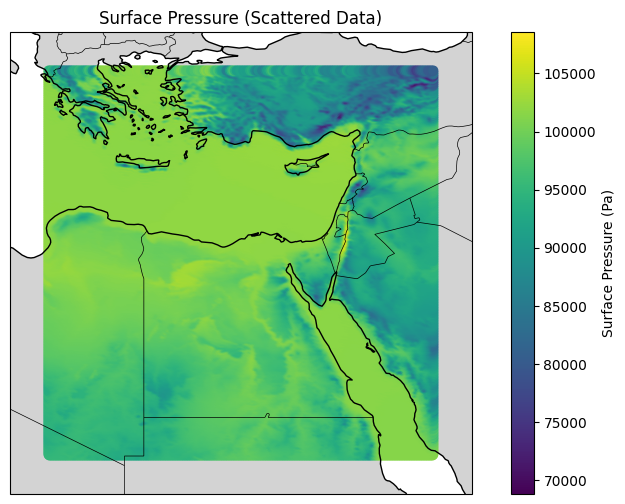

In [ ]:
import os
import json
from covjsonkit.api import Covjsonkit

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

for f in files:
    path = os.path.join(f,os.listdir(f)[0])

    with open(path) as f:
        covjson = json.load(f)
    
    # Load CovJson using covjsonkit into an xarray
    decoder = Covjsonkit().decode(covjson)
    ds = decoder.to_xarray()

    print(ds)
        
    # Extracting sp variable from dataset
    # Data in the original covjson is organize in points rather than lat/lon variables
    # so we plot as scatter.

    sp = ds['sp'].isel(datetimes=0, number=0, steps=0).values
    lats = ds['latitude'].values
    lons = ds['longitude'].values

    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    sc = ax.scatter(lons, lats, c=sp, s=40, cmap='viridis',
                    transform=ccrs.PlateCarree())
    
    plt.colorbar(sc, orientation='vertical', label='Surface Pressure (Pa)')

    margin = 2
    ax.set_extent([
        lons.min()-margin, lons.max()+margin,
        lats.min()-margin, lats.max()+margin
    ], crs=ccrs.PlateCarree())

    plt.title("Surface Pressure")
    plt.show()


